<a href="https://colab.research.google.com/github/Sudeb09/Data-Analysis-Using-Python/blob/main/Iris_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Iris Data Analysis Using Python

## **Introduction**

This dataset is an expanded version of the classic Iris flower dataset, widely used in pattern recognition, classification, and data visualization. It consists of 150 samples spanning three species: Iris-setosa, Iris-versicolor, and Iris-virginica. Each record includes four quantitative features — Sepal Length, Sepal Width, Petal Length, and Petal Width — all measured in centimeters.

The dataset illustrates typical real-world data challenges: some entries are missing or replaced with placeholders such as ?? or ###. Proper data cleaning, imputation, or removal of these inconsistencies is essential before any meaningful statistical analysis or machine learning modeling.

## **Key observations:**

  1.  There are three species: Iris-setosa, Iris-versicolor, and Iris-virginica.

  2. Some cells contain missing or invalid entries (like ?? or ###).

**Connecting the Google Drive with Google Colab**

In [80]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Importing The Required Libraries and Loading The Dataset**

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Loding the iris dataset from google drive
df  = pd.read_csv('/content/drive/MyDrive/Data Science Notebooks/Iris Data Analysis/Iris_data_sample.csv', index_col=0, na_values=['??', '###'])

# **Overview of The Iris Dataset**

1. The dimensions of the dataset.

In [82]:
print("The dimensions of the dataset :", df.shape)

The dimensions of the dataset : (150, 5)


2. The column names and types.

In [83]:
print("-- The columns name and type --")
print(df.dtypes)

-- The columns name and type --
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object


3. First and Last 5 rows of the dataset.

In [84]:
print("First 5 rows : ")
print(df.head())

print()
print("Last 5 rows : ")
print(df.tail())

First 5 rows : 
   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
1            5.1           3.5            1.4           0.2  Iris-setosa
2            4.9           NaN            1.4           0.2          NaN
3            4.7           3.2            1.3           0.2  Iris-setosa
4            NaN           3.1            1.5           0.2  Iris-setosa
5            5.0           3.6            NaN           0.2  Iris-setosa

Last 5 rows : 
     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm         Species
146            6.7           3.0            5.2           2.3  Iris-virginica
147            6.3           2.5            5.0           1.9  Iris-virginica
148            6.5           3.0            5.2           2.0  Iris-virginica
149            6.2           3.4            5.4           2.3  Iris-virginica
150            5.9           3.0            5.1           1.8  Iris-virginica


Here we can see some NaN values in our dataset. So now we count the missing values and clean the dataset.

## **Data Cleaning**

1. Missing values in the dataset

In [85]:
print(df.isnull().sum())

SepalLengthCm    1
SepalWidthCm     1
PetalLengthCm    2
PetalWidthCm     0
Species          1
dtype: int64


Here we can clearly see the numbers of missing values present in the dataset. Now we clean all the NaN values for a clear analysis.

2. Cleaning data on "SepalLengthCm'

In [86]:
print("Rows where PetalLengthCm is NaN:")
display(df[df['SepalLengthCm'].isnull()])

Rows where PetalLengthCm is NaN:


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
4,NaN,3.1,1.5,0.2,Iris-setosa


In [87]:
# Find the row number where 'SepalLengthCm' is NaN
nan_index = df[df['SepalLengthCm'].isnull()].index

# Iterate through the indices with NaN SepalLengthCm
for index in nan_index:
    # Find the value of 'SepalWidthCm' and 'Species' in that row
    sepal_width_value = df.loc[index, 'SepalWidthCm']
    species_value = df.loc[index, 'Species']

    # Check if both sepal_width_value and species_value are not NaN
    if pd.notna(sepal_width_value) and pd.notna(species_value):
        # Calculate the average of 'SepalLengthCm' where 'SepalWidthCm' equals the found value AND Species equals the found value
        average_sepal_length = df[(df['SepalWidthCm'] == sepal_width_value) & (df['Species'] == species_value)]['SepalLengthCm'].mean()

        # Replace the NaN 'SepalLengthCm' by the calculated average
        df.loc[index, 'SepalLengthCm'] = average_sepal_length
    elif pd.notna(sepal_width_value):
         # If only SepalWidthCm is not NaN, calculate the average based on SepalWidthCm
         average_sepal_length = df[df['SepalWidthCm'] == sepal_width_value]['SepalLengthCm'].mean()
         df.loc[index, 'SepalLengthCm'] = average_sepal_length
    else:
        # Handle cases where both or either are NaN in the row with NaN SepalLengthCm - could fill with overall mean or leave as NaN
        pass # Or df.loc[index, 'SepalLengthCm'] = df['SepalLengthCm'].mean()


print("Missing values after filling SepalLengthCm based on SepalWidthCm and Species:")
print(df.isnull().sum())

Missing values after filling SepalLengthCm based on SepalWidthCm and Species:
SepalLengthCm    0
SepalWidthCm     1
PetalLengthCm    2
PetalWidthCm     0
Species          1
dtype: int64


3. Cleaning data on "SepalWidthCm'

In [88]:
print("Rows where SepalWidthCm is NaN:")
display(df[df['SepalWidthCm'].isnull()])

Rows where SepalWidthCm is NaN:


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
2,4.9,NaN,1.4,0.2,NaN


Here we can see the corrosponding species in NaN. So we need to remove this whole row for clear analysis.

In [89]:
df.dropna(subset=['Species'], inplace=True)
print("Missing values after dropping rows with missing Species:")
print(df.isnull().sum())

Missing values after dropping rows with missing Species:
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    2
PetalWidthCm     0
Species          0
dtype: int64


4. Cleaning data on "PetalLengthCm'

In [90]:
print("Rows where PetalLengthCm is NaN:")
display(df[df['PetalLengthCm'].isnull()])

Rows where PetalLengthCm is NaN:


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
5,5.0,3.6,NaN,0.2,Iris-setosa
6,5.4,3.9,NaN,0.4,Iris-setosa


In [91]:
# Find the row number where 'PetalLengthCm' is NaN
nan_index = df[df['PetalLengthCm'].isnull()].index

# Iterate through the indices with NaN PetalLengthCm
for index in nan_index:
    # Find the value of 'SepalWidthCm' and 'Species' in that row
    petal_width_value = df.loc[index, 'PetalWidthCm']
    species_value = df.loc[index, 'Species']

    # Check if both sepal_width_value and species_value are not NaN
    if pd.notna(petal_width_value) and pd.notna(species_value):
        # Calculate the average of 'PetalLengthCm' where 'PetalWidthCm' equals the found value AND Species equals the found value
        average_petal_length = df[(df['PetalWidthCm'] ==petal_width_value) & (df['Species'] == species_value)]['PetalLengthCm'].mean()

        # Replace the NaN 'PetalLengthCm' by the calculated average
        df.loc[index, 'PetalLengthCm'] = average_petal_length
    elif pd.notna(petal_width_value):
         # If only PetalWidthCm is not NaN, calculate the average based on PetalWidthCm
         average_petal_length = df[df['PetalWidthCm'] == petal_width_value]['PetalalLengthCm'].mean()
         df.loc[index, 'PetalalLengthCm'] = average_petal_length
    else:
        # Handle cases where both or either are NaN in the row with NaN PetalLengthCm - could fill with overall mean or leave as NaN
        pass # Or df.loc[index, 'PetalLengthCm'] = df['PetalLengthCm'].mean()


print("Missing values after filling PetalalLengthCm based on PetalalWidthCm and Species:")
print(df.isnull().sum())

Missing values after filling PetalalLengthCm based on PetalalWidthCm and Species:
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


## **Visualization**

Q.1 - Calculate the records presents in the dataset by species

In [97]:
df.value_counts('Species')

,count
Species,
Iris-versicolor,50
Iris-virginica,50
Iris-setosa,49


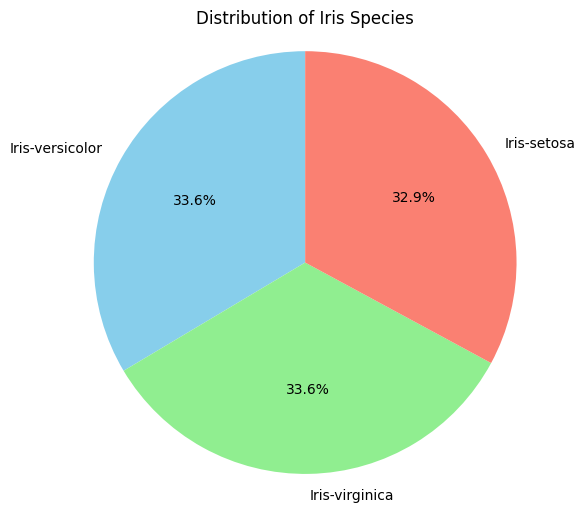

In [98]:
import matplotlib.pyplot as plt

species_counts = df.value_counts('Species')

plt.figure(figsize=(6, 6))
plt.pie(species_counts, labels=species_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen', 'salmon'])
plt.title('Distribution of Iris Species')
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

Q.2 - Calcullate the maximum, minimum, average numerical features values based on the species.

In [92]:
df.groupby('Species').agg(['max', 'min', 'mean'])

SepalLengthCm                SepalWidthCm                 \
                          max  min      mean          max  min      mean   
Species                                                                    
Iris-setosa               5.8  4.3  5.013776          4.4  2.3  3.426531   
Iris-versicolor           7.0  4.9  5.936000          3.4  2.0  2.770000   
Iris-virginica            7.9  4.9  6.588000          3.8  2.2  2.974000   

                PetalLengthCm                PetalWidthCm                 
                          max  min      mean          max  min      mean  
Species                                                                   
Iris-setosa               1.9  1.0  1.463187          0.6  0.1  0.244898  
Iris-versicolor           5.1  3.0  4.260000          1.8  1.0  1.326000  
Iris-virginica            6.9  4.5  5.552000          2.5  1.4  2.026000

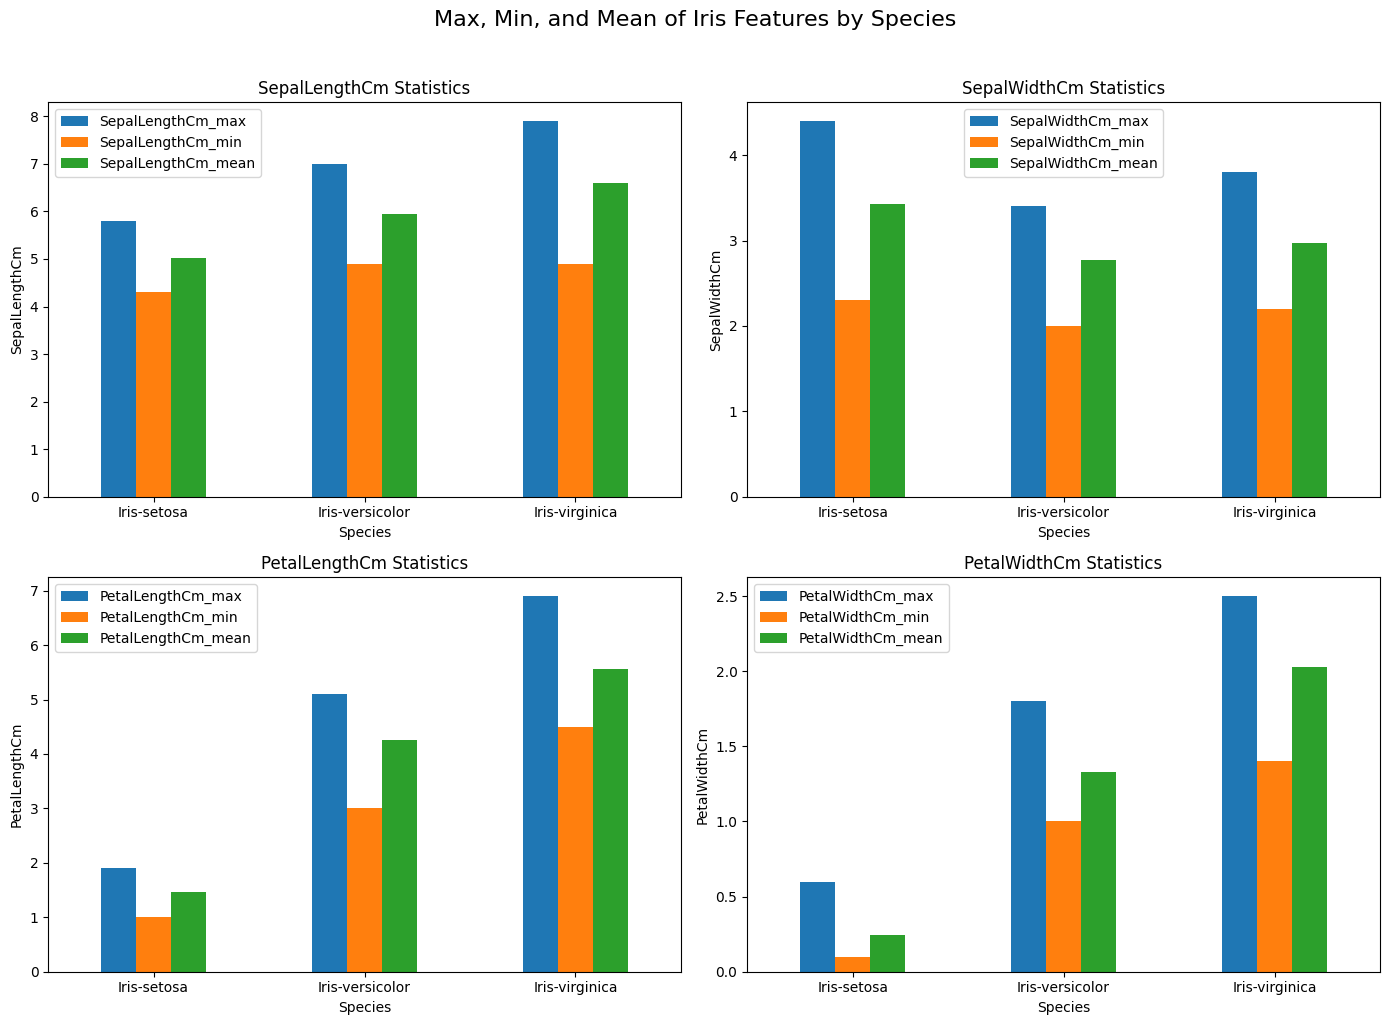

In [96]:
import matplotlib.pyplot as plt

# Get the aggregated data from the previous cell
aggregated_data = df.groupby('Species').agg(['max', 'min', 'mean'])

# Flatten the multi-level columns for easier plotting
aggregated_data.columns = ['_'.join(col).strip() for col in aggregated_data.columns.values]

# Plotting
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
fig.suptitle('Max, Min, and Mean of Iris Features by Species', y=1.02, fontsize=16)

features = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
for i, feature in enumerate(features):
    row = i // 2
    col = i % 2
    aggregated_data[[f'{feature}_max', f'{feature}_min', f'{feature}_mean']].plot(kind='bar', ax=axes[row, col])
    axes[row, col].set_title(f'{feature} Statistics')
    axes[row, col].set_ylabel(feature)
    axes[row, col].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

## **Explanation of the Visualization**

The figure presents a comparative summary of the maximum, minimum, and mean values for each of the four Iris flower features (Sepal Length, Sepal Width, Petal Length, and Petal Width) across the three species: Iris-setosa, Iris-versicolor, and Iris-virginica.

The visualization is organized into four subplots:

    SepalLengthCm Statistics (top-left) — Displays the max, min, and mean sepal
    lengths for each species.

    SepalWidthCm Statistics (top-right) — Shows the same statistics for sepal width.

    PetalLengthCm Statistics (bottom-left) — Highlights the variation in petal length.

    PetalWidthCm Statistics (bottom-right) — Compares the petal width statistics.

Key Insights:

Iris-virginica generally has the largest sepal and petal measurements among the three species.

Iris-setosa has the smallest petal dimensions but a relatively wide sepal compared to Iris-versicolor.

The differences in petal length and width are especially significant between Iris-setosa and the other two species, which is one reason why petal measurements are often strong predictors for classifying Iris species.

The minimum values show the natural lower bounds of each measurement, while the mean values give a good indication of the typical size for each species.

Overall, this grouped bar chart makes it easy to compare species differences and understand the range and average of each feature, which is useful for both exploratory data analysis and feature selection for classification tasks.

